In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Import data
!wget -q https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
# Label encoding
dataset["sex"] = dataset["sex"].map({"male": 0, "female": 1})
dataset["smoker"] = dataset["smoker"].map({"no": 0, "yes": 1})
dataset["region"] = dataset["region"].map({"northeast": 0,
                                           "northwest": 1,
                                           "southeast": 2,
                                           "southwest": 3})

In [4]:
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,0,31.0,3,0,1,10600.55
1334,18,1,31.9,0,0,0,2205.98
1335,18,1,36.9,0,0,2,1629.83
1336,21,1,25.8,0,0,3,2007.95
1337,61,1,29.1,0,1,1,29141.36


In [5]:
# Split into train and test (80/20) (it shuffles the dataset by default)
from sklearn.model_selection import train_test_split
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2)

In [6]:
print(train_dataset.shape, test_dataset.shape)

(1070, 7) (268, 7)


In [7]:
# Pop off the "expenses" column to create labels
train_labels = train_dataset.pop("expenses")
test_labels = test_dataset.pop("expenses")

In [8]:
# Build the model
model = keras.models.Sequential([
    keras.layers.Input(shape=(train_dataset.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    keras.layers.Dense(256, activation="selu"),
    keras.layers.Dense(128, activation="selu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1),
])

In [9]:
# Compile the model
model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae", "mse"],
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization                  │ (None, 6)                   │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,841 (136.10 KB)

 Trainable params: 34,829 (136.05 KB)

 Non-trainable params: 12 (48.00 B)

In [10]:
# Train the model
model.fit(
    train_dataset,
    train_labels,
    epochs=500,
    batch_size=32,
    verbose=0,
)

In [11]:
model.evaluate(test_dataset, test_labels, verbose=2)

9/9 - 0s - 17ms/step - loss: 23668250.0000 - mae: 2548.8772 - mse: 23668248.0000


[23668250.0, 2548.877197265625, 23668248.0]

9/9 - 0s - 4ms/step - loss: 23668250.0000 - mae: 2548.8772 - mse: 23668248.0000
Testing set Mean Abs Error: 2548.88 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


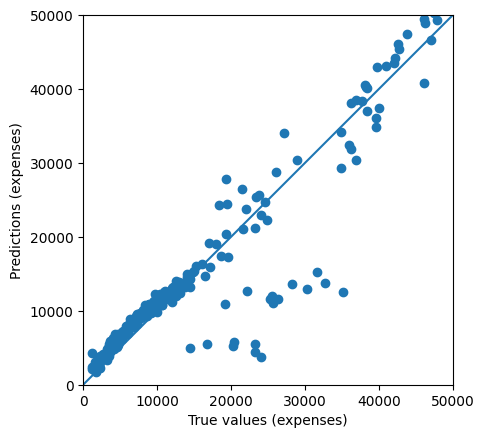

In [12]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
